In [93]:
import numpy as np
import matplotlib.pyplot as plt

In [94]:
def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)

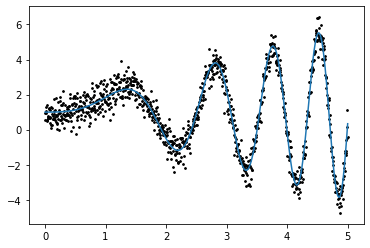

In [95]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

In [96]:
X.shape, y.shape

((1000,), (1000,))

In [97]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

((1000, 1), (1000, 1))

# LinearRegression

In [98]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

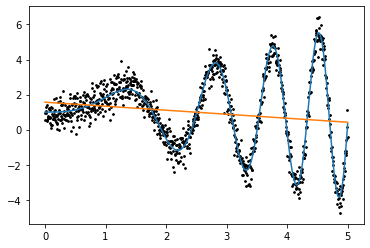

In [99]:
f_x, f_y = f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(),y.flatten(),s=3,c="black")    #s = 점 굵기
plt.plot(X.flatten(),lr.predict(X).flatten())
plt.show()

# Polynomial LinearRegression

In [100]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)   # 절편항도 만들어주므로 3개의 열이 나온다.
X_poly = poly_features.fit_transform(X)
X_poly[:10]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04],
       [1.00000000e+00, 1.50150150e-02, 2.25450676e-04],
       [1.00000000e+00, 2.00200200e-02, 4.00801202e-04],
       [1.00000000e+00, 2.50250250e-02, 6.26251878e-04],
       [1.00000000e+00, 3.00300300e-02, 9.01802704e-04],
       [1.00000000e+00, 3.50350350e-02, 1.22745368e-03],
       [1.00000000e+00, 4.00400400e-02, 1.60320481e-03],
       [1.00000000e+00, 4.50450450e-02, 2.02905608e-03]])

In [101]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

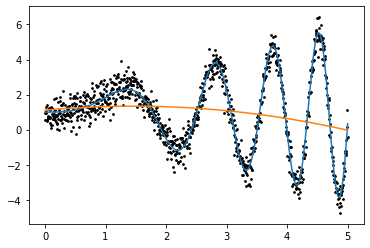

In [102]:
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(),y.flatten(),s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [103]:
# 항을 더 늘려보자
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00500501e-03, 2.50500751e-05, ...,
        6.18960915e-33, 3.09790248e-35, 1.55050174e-37],
       [1.00000000e+00, 1.00100100e-02, 1.00200300e-04, ...,
        1.01410556e-28, 1.01512068e-30, 1.01613682e-32],
       ...,
       [1.00000000e+00, 4.98998999e+00, 2.49000001e+01, ...,
        5.93465452e+09, 2.96138666e+10, 1.47772898e+11],
       [1.00000000e+00, 4.99499499e+00, 2.49499750e+01, ...,
        6.01853518e+09, 3.00625531e+10, 1.50162302e+11],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, ...,
        6.10351562e+09, 3.05175781e+10, 1.52587891e+11]])

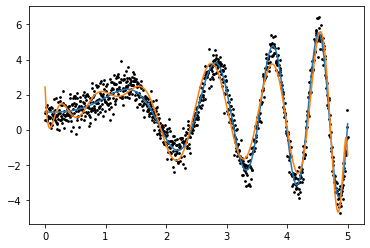

In [104]:
lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

## rmse

In [105]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# 여러 모델과 비교
## 최적 파라미터 찾기

In [106]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

In [107]:
poly_range = list(range(10, 50))
rmse_lr_list = []
rmse_lasso_list = []
rmse_ridge_list = []

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

for poly_value in poly_range:
    # Linear
    poly_features = PolynomialFeatures(degree=poly_value)
    X_poly = poly_features.fit_transform(X)
    lr = LinearRegression()
    lr.fit(X_poly,y)
    rmse_lr_list.append(rmse(lr.predict(X_poly), y))
    
    # Lasso
    lasso = Lasso()
    lasso.fit(X_poly,y)
    rmse_lasso_list.append(rmse(lasso.predict(X_poly), y))
    
    
    # Ridge
    ridge = Ridge()
    ridge.fit(X_poly,y)
    rmse_ridge_list.append(rmse(ridge.predict(X_poly), y))

C:\Users\meuch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2044.449590121619, tolerance: 0.44953636279566495
  positive)
C:\Users\meuch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2037.6107061912105, tolerance: 0.44953636279566495
  positive)
C:\Users\meuch\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.00523e-18): result may not be accurate.
  overwrite_a=True).T
C:\Users\meuch\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2031.3034594066216, tolerance: 0.44953636279566495
  positive)
C:\Users\m

In [108]:
import pandas as pd
from pandas import DataFrame
data = {"poly_range" : poly_range,
        "lr_rmse" : rmse_lr_list,
        "lasso_rmse" : rmse_lasso_list,
        "ridge_rmse" : rmse_ridge_list}

df = DataFrame(data).set_index("poly_range")
df

,lr_rmse,lasso_rmse,ridge_rmse
poly_range,,,
10,1.890014,2.212550,1.916137
11,1.882125,2.220998,1.893590
12,1.608267,2.226083,1.891523
13,1.340280,2.228958,1.862578
14,1.321445,2.230637,1.685363
15,0.923192,2.231564,1.517937
16,0.725638,2.231968,1.482514
17,0.688534,2.231983,1.284666
18,0.712045,2.231723,0.874296


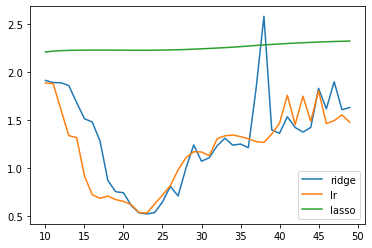

In [109]:
plt.plot(poly_range, df["ridge_rmse"], label="ridge")
plt.plot(poly_range, df["lr_rmse"], label="lr")
plt.plot(poly_range, df["lasso_rmse"], label="lasso")
plt.legend()
plt.show()

In [110]:
df.min()
# ridge에서 가장 작은 rmse가 나왔기 때문에 ridge로 채택

lr_rmse       0.535540
lasso_rmse    2.212550
ridge_rmse    0.525805
dtype: float64

In [111]:
# ridge에서 몇개의 degree에서 rmse가 가장 낮았는가. 23개
df["ridge_rmse"].sort_values().head()

poly_range
23    0.525805
22    0.536398
24    0.539768
21    0.612712
25    0.650246
Name: ridge_rmse, dtype: float64

In [112]:
# 23개로 모형을 찾아보자
poly_features = PolynomialFeatures(degree = 23)
X_poly = poly_features.fit_transform(X)
ridge = Ridge(fit_intercept=False)
ridge.fit(X_poly,y)


Ridge(alpha=1.0, copy_X=True, fit_intercept=False, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

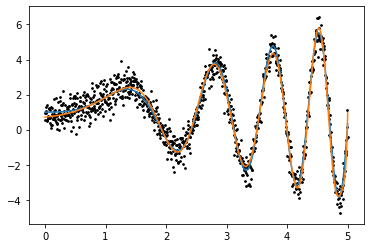

In [113]:
f_x, f_y = f(1000)
plt.plot(f_x,f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), ridge.predict(X_poly).flatten())
plt.show()